# BioBot_FDS_05_Prepare_Moving_Windows_Ds
## Deliverable_05: Preparing a balanced dataset using moving windows
Author/code developer: Yan Bello. 18/11/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---



In [5]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive:  
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "dr_safaei/fall_data/"

print(FILE_DIRECTORY)
print(SisFall_ALL_DIRECTORY)

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive/My Drive/Colab Notebooks/
gdrive/My Drive/Colab Notebooks/dr_safaei/fall_data/


In [6]:
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [0]:
from google.colab import files
import zipfile #, io, os

#print(SisFall_ALL_DIRECTORY + 'SisFall_dataset.zip')

#DATA_DIRECTORY =  SisFall_ALL_DIRECTORY + "data/"
# zfile = zipfile.ZipFile(SisFall_ALL_DIRECTORY + 'SisFall_dataset.zip', 'r') 
# zfile.extractall(DATA_DIRECTORY)
DATA_DIRECTORY =  SisFall_ALL_DIRECTORY  # + "fall/"
DATA_DIRECTORY_NOFALL =  SisFall_ALL_DIRECTORY   #+ "nofall/"

## 5.1 Read the file names

In [8]:
# Import required libraries
import os
from os import walk
import pandas as pd
import numpy as np
import glob

# The dataset files must be located in the "SisFall_dataset_ALL" folder 

file_names = []
dir_names = []

print(DATA_DIRECTORY+'*/*.csv')
file_path = glob.glob(DATA_DIRECTORY+'*/*.csv')
file_name = [os.path.basename(p) for p in file_path]
print(file_name)
print(len(file_name))
print(type(file_name[0]))


# Create a dataframe and load filenames into the File column
df_Files_Trials = pd.DataFrame({"File": file_name, "Path": file_path})
#print(df_Files_Trials['File'][0])
#print(df_Files_Trials.Path[0])

# Define a function fn to compute the values of the new column Act_Type
fn = lambda row: "FALL" if (row.File.find("fall") >= 0) else  "ADL"
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
df_Files_Trials = df_Files_Trials.assign(Act_Type=col.values) # assign values to column 'Act_Type'

# Define a function fn to compute the values of the new column Age_Cat
# fn = lambda row: (row.File[4:6]) 
# col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
# #print(col)
# df_Files_Trials = df_Files_Trials.assign(Age_Cat=col.values) # assign values to column 'Age_Cat'
# print(df_Files_Trials.loc)

# assign initial values to the following columns
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_HOR=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_HOR=0)


# in MS Windows systems,  desktop.ini file is automatically generated. Let's get rid of it...
df_Files_Trials.drop(df_Files_Trials.loc[df_Files_Trials['File']=="desktop.ini"].index, inplace=True)

# lets preview the header and tail of the dataset
print(df_Files_Trials.head())
print(df_Files_Trials.tail())

#print(df_Files_Trials)

# Note: this dataset includes 4.500 files. You should get this number of entries in the dataset.


gdrive/My Drive/Colab Notebooks/dr_safaei/fall_data/*/*.csv
['AccGyrMag_stand_and_fall_forward3.csv', 'AccGyrMag_stand_and_fallback.csv', 'AccGyrMag_stand_and_fallback2.csv', 'AccGyrMag_stand_and_fallback3.csv', 'AccGyrMag_walk_forward_fall_back3.csv', 'AccGyrMag_walk_forward_fall_back.csv', 'AccGyrMag_walk_forward_fall_back2.csv', 'AccGyrMag_walk_forward_fall_forward.csv', 'AccGyrMag_walk_forward_fall_forward2.csv', 'AccGyrMag_walk_forward_fall_forward3.csv', 'AccGyrMag_stand_and_fall_forward.csv', 'AccGyrMag_stand_and_fall_forward2.csv', 'AccGyrMag_walk_and_sit.csv', 'AccGyrMag_walk_and_sit2.csv', 'AccGyrMag_walk1.csv', 'AccGyrMag_walk2.csv', 'AccGyrMag_run1.csv', 'AccGyrMag_run2.csv']
18
<class 'str'>
                                    File  \
0  AccGyrMag_stand_and_fall_forward3.csv   
1       AccGyrMag_stand_and_fallback.csv   
2      AccGyrMag_stand_and_fallback2.csv   
3      AccGyrMag_stand_and_fallback3.csv   
4  AccGyrMag_walk_forward_fall_back3.csv   

                     

## 5.2 Balance the samples in the dataset

In [9]:
print("____________________________")
print("Activities of Daily Living (ADL):")
print(len(df_Files_Trials[df_Files_Trials.Act_Type.str.contains('D')]))
print("____________________________")
print("FALLS:")
print(len(df_Files_Trials[df_Files_Trials.Act_Type.str.contains('F')]))
number_of_FALLs = len(df_Files_Trials[df_Files_Trials.Act_Type.str.contains('F')])
df_Files_Falls = df_Files_Trials[df_Files_Trials.Act_Type.str.contains('F')]
df_Files_ADL = df_Files_Trials[df_Files_Trials.Act_Type.str.contains('D')]
print(len(df_Files_ADL))
# df_Files_ADL = df_Files_ADL.sample(n=number_of_FALLs,random_state=1)
# print(len(df_Files_ADL))
df_Files_ADL.head()
print("Contents of df_Files_Trials (Before pd.concat():")
print(len(df_Files_Trials))
# df_Files_Trials =  pd.concat([df_Files_ADL, df_Files_Falls], axis=0)
print("Contents of df_Files_Trials:")
print(len(df_Files_Trials))
print(df_Files_Trials.head())
df_Files_Trials.tail()

____________________________
Activities of Daily Living (ADL):
6
____________________________
FALLS:
12
6
Contents of df_Files_Trials (Before pd.concat():
18
Contents of df_Files_Trials:
18
                                    File  \
0  AccGyrMag_stand_and_fall_forward3.csv   
1       AccGyrMag_stand_and_fallback.csv   
2      AccGyrMag_stand_and_fallback2.csv   
3      AccGyrMag_stand_and_fallback3.csv   
4  AccGyrMag_walk_forward_fall_back3.csv   

                                                Path Act_Type  S1_Max_N_XYZ  \
0  gdrive/My Drive/Colab Notebooks/dr_safaei/fall...     FALL             0   
1  gdrive/My Drive/Colab Notebooks/dr_safaei/fall...     FALL             0   
2  gdrive/My Drive/Colab Notebooks/dr_safaei/fall...     FALL             0   
3  gdrive/My Drive/Colab Notebooks/dr_safaei/fall...     FALL             0   
4  gdrive/My Drive/Colab Notebooks/dr_safaei/fall...     FALL             0   

   S1_Max_N_HOR  S3_Max_N_XYZ  S3_Max_N_HOR  
0             0         

,File,Path,Act_Type,S1_Max_N_XYZ,S1_Max_N_HOR,S3_Max_N_XYZ,S3_Max_N_HOR
13,AccGyrMag_walk_and_sit2.csv,gdrive/My Drive/Colab Notebooks/dr_safaei/fall...,ADL,0,0,0,0
14,AccGyrMag_walk1.csv,gdrive/My Drive/Colab Notebooks/dr_safaei/fall...,ADL,0,0,0,0
15,AccGyrMag_walk2.csv,gdrive/My Drive/Colab Notebooks/dr_safaei/fall...,ADL,0,0,0,0
16,AccGyrMag_run1.csv,gdrive/My Drive/Colab Notebooks/dr_safaei/fall...,ADL,0,0,0,0
17,AccGyrMag_run2.csv,gdrive/My Drive/Colab Notebooks/dr_safaei/fall...,ADL,0,0,0,0


In [10]:
import matplotlib.pyplot as mplt
import numpy as np
import math



def do_array(ar):
  return np.sqrt(ar[0]**2 + ar[1]**2 + ar[2]**2)

def process_input_files(trial_file_path, Act_Type, FileName):
    df_Mediciones_WIP = pd.DataFrame(pd.read_csv(trial_file_path, header = None, sep = ',', 
                                         names = ["Acc_X", "Acc_Y", "Acc_Z", 
                                                  "Gyr_X", "Gyr_Y", "Gyr_Z", 
                                                  "Mag_X", "Mag_Y", "Mag_Z"], 
                                                   skiprows= 0))
  
    npData = df_Mediciones_WIP.values.astype(np.float32)    
    npData = np.nan_to_num(npData)
    
    vect = np.array([do_array(x) for x in npData[:,0:3]])
    vect = np.reshape(vect, (len(vect), 1))
    
    max_N = np.max(vect)
    max_N_index = np.argmax(vect)
    min_N = np.min(vect)
    min_N_index = np.argmin(vect)
    len_data = len(vect)    
    
      
    win_size = 200 #sample = 1s
    
    # We work with a sliding-window of 1sec (200 measurements), starting 2sec (200 measurements) before the peak/MAX
    if (max_N_index - 2*win_size<0):
        index_min_window = 0
        lend = (win_size*3)
        if lend >= len_data: lend = len_data -1
        index_max_window = lend        
       # print("VENTANA BAJA index:" + str(index_min_window))
    else:
        if (max_N_index + win_size+1 > len_data):
            lstart = len_data - (win_size*3)
            if lstart < 0 : lstart = 0
            index_min_window = lstart = 0
            index_max_window = len_data
           # print("VENTANA ALTA index:" + str(index_min_window))
        else:
            # extract the central window
            index_min_window = max_N_index - win_size*2
            lend = max_N_index + win_size
            if lend >= len_data: lend = len_data -1
            index_max_window = lend
           # print("VENTANA NORMAL index:" + str(index_min_window))



    tmpData3 = np.hstack((npData[index_min_window:index_max_window,:], vect[index_min_window:index_max_window]))
    print("shape = " + str(tmpData3.shape))
    
    tmpData2 = np.array([tmpData3, trial_file_path, Act_Type, FileName])
    tmpData = tmpData2[0]


    global allData
    allData = np.vstack((allData, tmpData2))
  

      
    
    
import time
from datetime import timedelta

start_time = time.time()
    
allData = np.array([0,0,0,0], dtype=object)
total_num_iter = len(df_Files_Trials.Path)
iter_no = 1
iter_start_time = time.time()

for index, row in df_Files_Trials.iterrows():
  
#   if (iter_no > 5):
#     break
      
  iter_no += 1
  print("iter_no: ", iter_no)
  print("index: ", index)
  print(row.File)
  
  process_input_files(row.Path, row.Act_Type, row.File)
#   print(allData.shape)
  
  elapsed_time_secs = time.time() - iter_start_time
  msg = "Iteration took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
  print(msg)
  remaining_time = round(((time.time() - start_time)/iter_no)*(total_num_iter-iter_no))
  msg = "REMAINING TIME: %s secs (Wall clock time)" % timedelta(seconds = remaining_time)
  print(msg)

  print("________________________________________________________________________________________")    
    
  
  
  
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY #+ "save_data/"
fname = OUTPUT_DIRECTORY + 'Unified_ADL_Falls_BALANCED.npy'
print(fname)
np.save(fname, allData)

allfile2 = np.load(fname, allow_pickle=True)
#print(allfile2)
print(allfile2.shape)










iter_no:  2
index:  0
AccGyrMag_stand_and_fall_forward3.csv
shape = (419, 10)
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:00:03 secs (Wall clock time)
________________________________________________________________________________________
iter_no:  3
index:  1
AccGyrMag_stand_and_fallback.csv
shape = (312, 10)
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:00:03 secs (Wall clock time)
________________________________________________________________________________________
iter_no:  4
index:  2
AccGyrMag_stand_and_fallback2.csv
shape = (310, 10)
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:00:04 secs (Wall clock time)
________________________________________________________________________________________
iter_no:  5
index:  3
AccGyrMag_stand_and_fallback3.csv
shape = (415, 10)
Iteration took: 0:00:01 secs (Wall clock time)
REMAINING TIME: 0:00:04 secs (Wall clock time)
__________________________________________________________

[0]
AccGyrMag_stand_and_fall_forward3.csv
gdrive/My Drive/Colab Notebooks/dr_safaei/fall_data/fall/AccGyrMag_stand_and_fall_forward3.csv
len=  420
max_N_index=  289
VENTANA BAJA index:0
max_N = 2.9556622082313138
max_N_index = 289
min_N = 0.9070190678798495
min_N_index = 104
(19, 4)
[1]
AccGyrMag_stand_and_fallback.csv
gdrive/My Drive/Colab Notebooks/dr_safaei/fall_data/fall/AccGyrMag_stand_and_fallback.csv
len=  313
max_N_index=  192
VENTANA BAJA index:0
max_N = 2.1541687995518624
max_N_index = 192
min_N = 0.6266615876662675
min_N_index = 296
(19, 4)


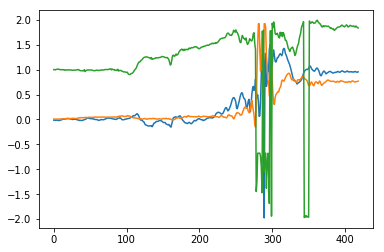

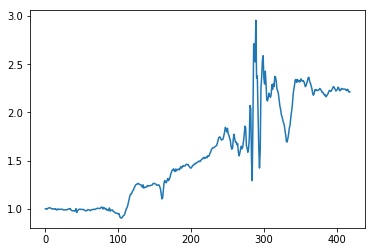

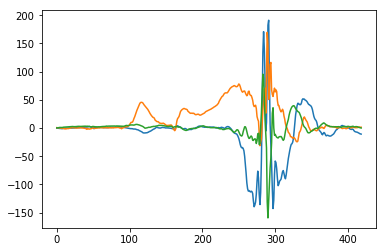

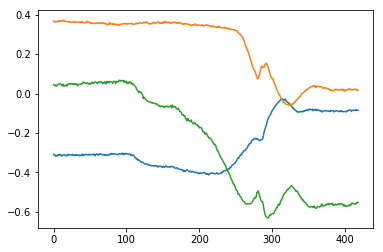

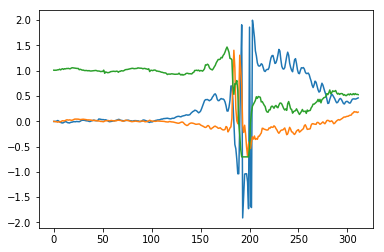

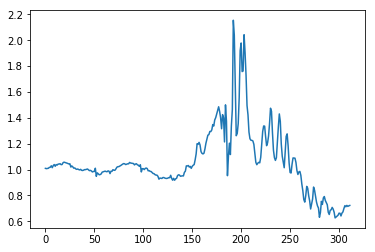

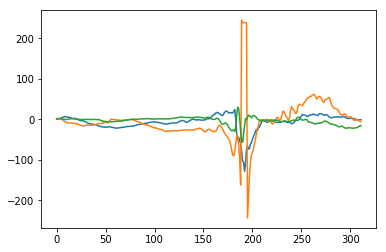

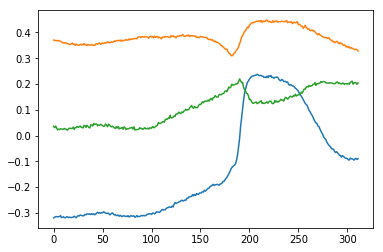

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as mplt
import numpy as np
import math



def do_array(ar):
  return np.sqrt(ar[0]**2 + ar[1]**2 + ar[2]**2)

def plot_trial_file(trial_file_path, Act_Type, FileName):
    df_Mediciones_WIP = pd.DataFrame(pd.read_csv(trial_file_path, header = None, sep = ',', 
                                         names = ["Acc_X", "Acc_Y", "Acc_Z", 
                                                  "Gyr_X", "Gyr_Y", "Gyr_Z", 
                                                  "Mag_X", "Mag_Y", "Mag_Z"], 
                                                   skiprows= 0))

  
  
    npData = df_Mediciones_WIP.values.astype(np.float32)
    npData = np.nan_to_num(npData)
    
    vect = np.array([do_array(x) for x in npData[:,0:3]])
    vect = np.reshape(vect, (len(vect), 1))
    max_N = np.max(vect)
    max_N_index = np.argmax(vect)
    min_N = np.min(vect)
    min_N_index = np.argmin(vect)
    len_data = len(vect)
    
    print("len= " , len_data)
    print("max_N_index= " , max_N_index)
    
    win_size = 200 #sample = 1s
    
    # We work with a sliding-window of 1sec (200 measurements), starting 2sec (200 measurements) before the peak/MAX
    if (max_N_index - 2*win_size<0):
        index_min_window = 0
        lend = (win_size*3)
        if lend >= len_data: lend = len_data -1
        index_max_window = lend        
        print("VENTANA BAJA index:" + str(index_min_window))
    else:
        if (max_N_index + win_size+1 > len_data):
            lstart = len_data - (win_size*3)
            if lstart < 0 : lstart = 0
            index_min_window = lstart = 0
            index_max_window = len_data
            print("VENTANA ALTA index:" + str(index_min_window))
        else:
            # extract the central window
            index_min_window = max_N_index - win_size*2
            lend = max_N_index + win_size
            if lend >= len_data: lend = len_data -1
            index_max_window = lend
            print("VENTANA NORMAL index:" + str(index_min_window))

    print("max_N = " + str(max_N))
    print("max_N_index = " + str(max_N_index))
    print("min_N = " + str(min_N))
    print("min_N_index = " + str(min_N_index))  
    
#     print(npData[index_min_window:index_max_window,:].shape)
#     print(vect[index_min_window:index_max_window].shape)
    
    tmpData3 = np.hstack((npData[index_min_window:index_max_window,:], vect[index_min_window:index_max_window]))
#     print("shape = " + str(tmpData3.shape))
    
    tmpData2 = np.array([tmpData3, trial_file_path, Act_Type, FileName])
    tmpData = tmpData2[0]
#     print(tmpData2[1])
#     print(tmpData2[2])
#     print(tmpData2[3])
#     print(tmpData2[4])

#     global allData
# #     print(allData.shape)
# #     print(tmpData2.shape)
#     allData = np.vstack((allData, tmpData2))
#     #print(allData.shape)
#     #allData = allData2
        
    mplt.plot(tmpData[:,0:3])
    mplt.figure()
    mplt.plot(tmpData[:, 9])
    mplt.figure()
    mplt.plot(tmpData[:,3:6])
    mplt.figure()
    mplt.plot(tmpData[:,6:9])
    mplt.figure()
#     mplt.plot(npData[:,0:3])
#     mplt.figure()


    


  
l1 = df_Files_Trials.index[df_Files_Trials.File == "AccGyrMag_stand_and_fall_forward3.csv"].tolist()
print(l1)
print(df_Files_Trials.File.loc[l1[0]])

file_list = df_Files_Trials.Path.loc[l1[0]]
print(file_list)


plot_trial_file(file_list, df_Files_Trials.Act_Type.loc[l1[0]], df_Files_Trials.File.loc[l1[0]])
print(allData.shape)

l1 = df_Files_Trials.index[df_Files_Trials.File == "AccGyrMag_stand_and_fallback.csv"].tolist()
print(l1)
print(df_Files_Trials.File.loc[l1[0]])

file_list = df_Files_Trials.Path.loc[l1[0]]
print(file_list)


plot_trial_file(file_list, df_Files_Trials.Act_Type.loc[l1[0]], df_Files_Trials.File.loc[l1[0]])
print(allData.shape)

In [12]:
import matplotlib.pyplot as mplt
import numpy as np
import math



def do_array(ar):
  return np.sqrt(ar[0]**2 + ar[1]**2 + ar[2]**2)

def label_dataset(row, index):

    data = row[0]
    path = row[1]
    Act_Type = row[2]
    #Act_Cat = row[3]
    FileName = row[3]
    
#     print(Act_Type[0])
#     print(Act_Cat)
#     print(data.shape)
    #print(FileName)
    
    acc = data[:, 0:3]
    Gyr = data[:, 3:6]
    Mag = data[:, 6:9]
    vec = data[:, 9]
    
    max_N = np.max(vec)
    max_N_index = np.argmax(vec)
    min_N = np.min(vec)
    min_N_index = np.argmin(vec)
    len_data = len(vec)
    
#     print("max_N = " + str(max_N))
#     print("max_N_index = " + str(max_N_index))
#     print("min_N = " + str(min_N))
#     print("min_N_index = " + str(min_N_index))     
    
    win_size = 50 #150 #200 sample = 1s
    win_step = 3 #7
    win_step2 = 1 #3
    
    global preList
    global inList
    global postList
    global F_Num
    global D_Num
        
    
    if (str.upper(Act_Type[1]) == "D") :
#       print("D_Type")
      D_Num += 1
#       preList = np.array([0,0,0,0,0], dtype=object)    
      for i in range(0, len_data-win_size-win_step, 7*win_step) :
        #print("i= ", i)
        if i+win_size > len_data-win_step :
          print("break1: ", i)
          break

        tmpData2 = np.array([data[i:i+win_size, :], DATA_TYPE["pre"], path, Act_Type, FileName])
        preList = np.vstack((preList, tmpData2))
            
#       print("preList.shape: ", preList.shape)  
#       mplt.plot(preList[4,:][0][:,0:3])
#       mplt.figure()   
#       mplt.plot(accl1[:])
#       mplt.figure()       
      
    else :   
#       print("F_Type")
      F_Num += 1
      startIndex = max_N_index-win_size-win_step
      if startIndex < 0 :
        print(FileName)
        print(index)
        print("anormal1!!")
        startIndex = 0
        print("max_N = " + str(max_N))
        print("max_N_index = " + str(max_N_index))
        print("min_N = " + str(min_N))
        print("min_N_index = " + str(min_N_index))    
        
      endIndex = max_N_index+win_step
      if endIndex > len_data :
        endIndex = len_data
        print(FileName)
        print("anormal2!!")

#       print(startIndex)
#       print(endIndex)
      
#       preList = np.array([0,0,0,0,0], dtype=object)    
      for i in range(0, startIndex, 7*win_step) :
#         print("i= ", i)
        if i+win_size > max_N_index-2*win_step :
          print("break2: ", i)
          break

        tmpData2 = np.array([data[i:i+win_size, :], DATA_TYPE["pre"], path, Act_Type, FileName])
        preList = np.vstack((preList, tmpData2))

#       print("preList.shape: ", preList.shape)

#       inList = np.array([0,0,0,0,0], dtype=object)
      for i in range(startIndex, startIndex+2*win_step, win_step2) :
#         print("i2= ", i)
        if i+win_size > max_N_index+win_step :
          print("break3: ", i)
          break

        tmpData2 = np.array([data[i:i+win_size, :], DATA_TYPE["fall"], path, Act_Type, FileName])
        inList = np.vstack((inList, tmpData2))      

#       print("inList.shape: ", inList.shape)

# #       postList = np.array([0,0,0,0,0], dtype=object)
#       for i in range(startIndex+2*win_step, endIndex, 7*win_step) :
# #         print("i3= ", i)
#         if i+win_size > len_data :
#           print("break: ", i)
#           break

#         tmpData2 = np.array([data[i:i+win_size, :], DATA_TYPE["post"], path, Act_Type, FileName])
#         postList = np.vstack((postList, tmpData2))      



    
    
import time
from datetime import timedelta

DATA_TYPE = {"pre":0, "fall":1, "post":2}

OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY #+ "data/"
fname = OUTPUT_DIRECTORY + 'Unified_ADL_Falls_BALANCED.npy'
print(fname)
allData = np.load(fname, allow_pickle=True)
print(allData[0,:])
allData = np.delete(allData, (0), axis=0)
print(allData.shape)

# print(allData[0,:].shape)
#D12_SA11_R01.txt 265
#D08_SA09_R04.txt 76

preList = np.array([0,0,0,0,0], dtype=object)   
inList = np.array([0,0,0,0,0], dtype=object)   
postList = np.array([0,0,0,0,0], dtype=object)   
F_Num = 0
D_Num = 0

index = 0
for row in allData :
  #print(index)
#   if (index > 1000) :
#     break
  index += 1
  label_dataset(row, index)
#   print("_______________________________________", index)
  
# print(preList[0,:])
# print(inList[0,:])
# print(postList[0,:])

preList = np.delete(preList, 0, axis=0)
inList = np.delete(inList, 0, axis=0)
postList = np.delete(postList, 0, axis=0)

print("preList: ", preList.shape)  
print("inList: ", inList.shape)  
print("postList: ", postList.shape)  
print("D_Num: ", D_Num)
print("F_Num: ", F_Num)

train_R = 0.6
test_R = 0.25
val_R = 0.15

print("********************************")
print("train_R: ", train_R)  
print("val_R: ", val_R)
print("test_R: ", test_R)

pre_train_N = int(0.6 * preList.shape[0])
pre_test_N = int(0.25 * preList.shape[0])
pre_val_N = int(0.15 * preList.shape[0])

in_train_N = int(0.6 * inList.shape[0])
in_test_N = int(0.25 * inList.shape[0])
in_val_N = int(0.15 * inList.shape[0])

post_train_N = int(0.6 * postList.shape[0])
post_test_N = int(0.25 * postList.shape[0])
post_val_N = int(0.15 * postList.shape[0])

pre_range = np.random.permutation(preList.shape[0])
in_range = np.random.permutation(inList.shape[0])
post_range = np.random.permutation(postList.shape[0])

pre_train_list = preList[pre_range[0:pre_train_N], :]
pre_val_list = preList[pre_range[pre_train_N:pre_val_N+pre_train_N], :]
pre_test_list = preList[pre_range[pre_val_N+pre_train_N:], :]

in_train_list = inList[in_range[0:in_train_N], :]
in_val_list = inList[in_range[in_train_N:in_val_N+in_train_N], :]
in_test_list = inList[in_range[in_val_N+in_train_N:], :]
  
# post_train_list = postList[post_range[0:post_train_N], :]
# post_val_list = postList[post_range[post_train_N:post_val_N+post_train_N], :]
# post_test_list = postList[post_range[post_val_N+post_train_N:], :]

train_list = np.vstack((pre_train_list, in_train_list))#, post_train_list))
val_list = np.vstack((pre_val_list, in_val_list))#, post_val_list))
test_list = np.vstack((pre_test_list, in_test_list))#, post_test_list))

print("********************************")
print("train_list: ", train_list.shape)
print("val_list: ", val_list.shape)
print("test_list: ", test_list.shape)

# i = 0
# for v in train_list[:,0] :
#   if (len(v) != train_list[0,0].shape[0]):
#     print(v)
#     print(i)
#   i += 1
# #   if i > 0:
# #     break
  
# print(i, train_list[0,0].shape)

# label_dataset(allData[2711,:], 2711)
#   label_dataset(allData[2000,:])


gdrive/My Drive/Colab Notebooks/dr_safaei/fall_data/Unified_ADL_Falls_BALANCED.npy
[0 0 0 0]
(18, 4)
break2:  252
break2:  357
preList:  (333, 5)
inList:  (72, 5)
postList:  (4,)
D_Num:  6
F_Num:  12
********************************
train_R:  0.6
val_R:  0.15
test_R:  0.25
********************************
train_list:  (242, 5)
val_list:  (59, 5)
test_list:  (104, 5)


In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler

x_train = np.copy(train_list[:,0])
y_train = np.copy(train_list[:,1])
x_val = np.copy(val_list[:,0])
y_val = np.copy(val_list[:,1])
x_test = np.copy(test_list[:,0])
y_test = np.copy(test_list[:,1])

ran_indices = np.random.permutation(x_train.shape[0])
x_train = x_train[ran_indices]
y_train = y_train[ran_indices]
temp = []
for v in x_train :
  temp.append(v.ravel())  
x_train = np.array(temp).astype(np.float64)
y_train[y_train == 2] = 0
y_train = y_train.astype(np.float64)
print(x_train.shape)


ran_indices = np.random.permutation(x_val.shape[0])
x_val = x_val[ran_indices]
y_val = y_val[ran_indices]
temp = []
for v in x_val :
  temp.append(v.ravel()) 
x_val = np.array(temp).astype(np.float64)
y_val[y_val == 2] = 0
y_val = y_val.astype(np.float64)
print(x_val.shape)

ran_indices = np.random.permutation(x_test.shape[0])
x_test = x_test[ran_indices]
y_test = y_test[ran_indices]
temp = []
for v in x_test :
  temp.append(v.ravel())  
x_test = np.array(temp).astype(np.float64)
y_test[y_test == 2] = 0
y_test = y_test.astype(np.float64)
print(x_test.shape)


sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_val = sc.transform(x_val)  
x_test = sc.transform(x_test) 



print(x_test)


(242, 500)
(59, 500)
(104, 500)
[[ 0.49048058 -0.11647034  0.57106365 ... -0.48684742 -0.54322474
  -0.37011292]
 [-1.3567654   1.55897607 -1.33631036 ... -0.46873523 -0.58125384
  -1.04037374]
 [ 0.07456619  0.82156301  0.8656611  ... -0.39507927 -0.53435123
  -0.50142612]
 ...
 [-0.04218934  2.50763905 -1.07663055 ... -0.27916157 -0.51406914
  -1.00807219]
 [-0.34822924  0.28976833 -0.26291472 ...  1.1637725   1.0597034
  -0.7587457 ]
 [-0.72169005  1.22580981 -0.75261678 ... -0.31297081 -0.55780254
  -0.42476245]]


In [46]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the training data.
knn.fit(x_train, y_train)


# Make point predictions on the TRAINING set using the fit model.
predictions = knn.predict(x_train[:200])
print("Performance on TRAINING set:")
print(predictions)
print(knn.score(x_train[:200], y_train[:200]))

# Make point predictions on the test set using the fit model.
predictions = knn.predict(x_val[:100])
print("Performance on VALIDATION set:")
print(predictions)
print(knn.score(x_val[:1000], y_val[:1000]))

# Make point predictions on the TEST set using the fit model.
predictions = knn.predict(x_test[:400])
print("Performance on TEST set:")
print(predictions)
print(knn.score(x_test[:400], y_test[:400]))






cm = confusion_matrix(y_test[:400], predictions, labels=[0, 1])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")
# calculations of measurements of performance

knn_TP = cm[1,1]
knn_FN = cm[1,0]
knn_TN = cm[0,0]
knn_FP = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
knn_Sensitivity = knn_TP / (knn_TP + knn_FN)
print("knn_Sensitivity = "+ str(knn_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
knn_Specificity = knn_TN / (knn_FP + knn_TN)
print("knn_Specificity = "+ str(knn_Specificity))

# Precision = TP / (TP + FP)
knn_Precision = knn_TP / (knn_TP + knn_FP)
print("knn_Precision = "+ str(knn_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
knn_Accuracy = (knn_TP + knn_TN) / (knn_TP + knn_FP + knn_TN + knn_FN)
print("knn_Accuracy = "+ str(knn_Accuracy))

from sklearn.externals import joblib
from joblib import dump, load

OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY #+ "save_data/"
dump(knn, OUTPUT_DIRECTORY+'knn.joblib') 
classifier1 = load(OUTPUT_DIRECTORY+'knn.joblib', 'r' )
result = classifier1.score(x_test, y_test)
print(result)

Performance on TRAINING set:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
0.99
Performance on VALIDATION set:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
0.9661016949152542
Performance on TEST set:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0.

In [47]:
from sklearn.svm import LinearSVC
from sklearn.svm import libsvm
from sklearn.decomposition import PCA

NC = 140
pca = PCA(n_components=NC)   #n_components=2 
X_train = pca.fit_transform(x_train)  
X_test = pca.transform(x_test) 
explained_variance = pca.explained_variance_ratio_

print(explained_variance.shape)
print(explained_variance[:30])

# define the classifier
clf = LinearSVC(random_state=0, tol=1e-8, dual=False, verbose=1, max_iter=30)

# prepare/get the columns
# X= x_train[:5000]
X= X_train
y= y_train

# Fit/train classifier
clf.fit(X, y)

#print(clf.coef_)
#print(clf.intercept_)
print()
print(clf.C)
print("n_iter_: ", clf.n_iter_)

print("SVC PREDICTIONS ON THE TRAINING SET:")
predictions_SVC = clf.predict(X_test)
# print(predictions_SVC)
# print("-----------------------------")

cm = confusion_matrix(y_test, predictions_SVC, labels=[0, 1])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")

# calculations of measurements of performance

n_TP = cm[1,1]
n_FN = cm[1,0]
n_TN = cm[0,0]
n_FP = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
svc_Sensitivity = n_TP / (n_TP + n_FN)
print("svc_Sensitivity = "+ str(svc_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
svc_Specificity = n_TN / (n_FP + n_TN)
print("svc_Specificity = "+ str(svc_Specificity))

# Precision = TP / (TP + FP)
svc_Precision = n_TP / (n_TP + n_FP)
print("svc_Precision = "+ str(svc_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
svc_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("svc_Accuracy = "+ str(svc_Accuracy))

from sklearn.externals import joblib
from joblib import dump, load

OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY #+ "save_data/"
dump(clf, OUTPUT_DIRECTORY+'LinearSVC.joblib') 
classifier3 = load(OUTPUT_DIRECTORY+'LinearSVC.joblib')
#classifier3 = load(OUTPUT_DIRECTORY+'LinearSVC_100.joblib')
result = classifier3.score(X_test, y_test)
print(result)

(140,)
[0.20971658 0.16611707 0.13346695 0.07716073 0.0644265  0.05316087
 0.03650539 0.03223586 0.02437561 0.02362072 0.01639711 0.01354289
 0.01115319 0.01020461 0.00883253 0.00746344 0.00659558 0.00604564
 0.00516401 0.00500834 0.00465714 0.00462483 0.00450536 0.00407542
 0.00368973 0.00359448 0.00331931 0.0030157  0.00289187 0.00276407]
[LibLinear]
1.0
n_iter_:  30
SVC PREDICTIONS ON THE TRAINING SET:
Confusion Matrix:
-----------------
[[85  0]
 [ 0 19]]
-----------------
Confusion Matrix (Normalized):
-----------------------------
[[1. 0.]
 [0. 1.]]
-----------------------------
-----------------------------
svc_Sensitivity = 1.0
svc_Specificity = 1.0
svc_Precision = 1.0
svc_Accuracy = 1.0
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(verbose=1) 
classifier.fit(x_train[:10000], y_train[:10000])


print("RandomForest PREDICTIONS ON THE TRAINING SET:")
# Predicting the Test set results
y_pred = classifier.predict(x_test) 

# print(y_pred)
# print("-----------------------------")

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print("-----------------")
print(cm)
print("-----------------")
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion Matrix (Normalized):")
print("-----------------------------")
print(cm_norm)
print("-----------------------------")
print("-----------------------------")

# calculations of measurements of performance

n_TP = cm[1,1]
n_FN = cm[1,0]
n_TN = cm[0,0]
n_FP = cm[0,1]

# SENSITIVITY = TP / (TP + FN)
svc_Sensitivity = n_TP / (n_TP + n_FN)
print("svc_Sensitivity = "+ str(svc_Sensitivity))

# SPECIFICITY = TN / (FP + TN)
svc_Specificity = n_TN / (n_FP + n_TN)
print("svc_Specificity = "+ str(svc_Specificity))

# Precision = TP / (TP + FP)
svc_Precision = n_TP / (n_TP + n_FP)
print("svc_Precision = "+ str(svc_Precision))

# Accuracy = (TP + TN) / (TP + FP + TN + FN)
svc_Accuracy = (n_TP + n_TN) / (n_TP + n_FP + n_TN + n_FN)
print("svc_Accuracy = "+ str(svc_Accuracy))

from sklearn.externals import joblib
from joblib import dump, load

OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY #+ "save_data/"
dump(classifier, OUTPUT_DIRECTORY+'GradientBoostingClassifier.joblib') 
classifier2 = load(OUTPUT_DIRECTORY+'GradientBoostingClassifier.joblib')
#classifier2 = load(OUTPUT_DIRECTORY+'GradientBoostingClassifier_99.joblib')
result = classifier2.score(x_test, y_test)
print(result)


      Iter       Train Loss   Remaining Time 
         1           0.7467            0.72s
         2           0.6280            0.68s
         3           0.5396            0.66s
         4           0.4694            0.65s
         5           0.4116            0.64s
         6           0.3630            0.63s
         7           0.3215            0.62s
         8           0.2856            0.61s
         9           0.2544            0.61s
        10           0.2271            0.60s
        20           0.0778            0.52s
        30           0.0280            0.45s
        40           0.0102            0.39s
        50           0.0037            0.33s
        60           0.0014            0.26s
        70           0.0006            0.18s
        80           0.0005            0.11s
        90           0.0005            0.05s
       100           0.0004            0.00s
RandomForest PREDICTIONS ON THE TRAINING SET:
Confusion Matrix:
-----------------
[[85  0]
 [ 1 18]